# Introduction to Data Science and Machine Learning

<p align="center">
    <img width="699" alt="image" src="https://user-images.githubusercontent.com/49638680/159042792-8510fbd1-c4ac-4a48-8320-bc6c1a49cdae.png">
</p>

---

## Regression questions

The idea is to have here a set of small exercises helping you to (self-)check your understanding of the concepts.

### Exercise 1

Is there a relationship between water salinity & water temperature? Can you predict the water temperature based on salinity? 

1. Using data contained in this [csv](https://www.kaggle.com/sohier/calcofi#bottle.csv) and `sklearn`, try to give an answer to this question.



In [1]:
import pandas as pd

df =pd.read_csv("bottle.csv")


/Users/giovannimezzasalma/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (47,73) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [2]:
df_sal=df[['Salnty','T_degC']]
df_sal=df_sal.dropna()


In [3]:
df_sal.corr()

,Salnty,T_degC
Salnty,1.000000,-0.505266
T_degC,-0.505266,1.000000


In [4]:
df.columns

Index(['Cst_Cnt', 'Btl_Cnt', 'Sta_ID', 'Depth_ID', 'Depthm', 'T_degC',
       'Salnty', 'O2ml_L', 'STheta', 'O2Sat', 'Oxy_µmol/Kg', 'BtlNum',
       'RecInd', 'T_prec', 'T_qual', 'S_prec', 'S_qual', 'P_qual', 'O_qual',
       'SThtaq', 'O2Satq', 'ChlorA', 'Chlqua', 'Phaeop', 'Phaqua', 'PO4uM',
       'PO4q', 'SiO3uM', 'SiO3qu', 'NO2uM', 'NO2q', 'NO3uM', 'NO3q', 'NH3uM',
       'NH3q', 'C14As1', 'C14A1p', 'C14A1q', 'C14As2', 'C14A2p', 'C14A2q',
       'DarkAs', 'DarkAp', 'DarkAq', 'MeanAs', 'MeanAp', 'MeanAq', 'IncTim',
       'LightP', 'R_Depth', 'R_TEMP', 'R_POTEMP', 'R_SALINITY', 'R_SIGMA',
       'R_SVA', 'R_DYNHT', 'R_O2', 'R_O2Sat', 'R_SIO3', 'R_PO4', 'R_NO3',
       'R_NO2', 'R_NH4', 'R_CHLA', 'R_PHAEO', 'R_PRES', 'R_SAMP', 'DIC1',
       'DIC2', 'TA1', 'TA2', 'pH2', 'pH1', 'DIC Quality Comment'],
      dtype='object')

In [5]:
from sklearn.model_selection import train_test_split

import numpy as np

X=df_sal['Salnty']
y=df_sal['T_degC']



In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Import libraries we will need in the following


from sklearn import linear_model

model = linear_model.LinearRegression()
model.fit(X_train.values.reshape(-1,1), y_train)

LinearRegression()

In [8]:
prediction = model.predict(X_test.values.reshape(-1, 1))

In [9]:
# r2 score

from sklearn.metrics import r2_score

r2_score(y_test, prediction)

0.25243262520963594

In [10]:
#errore relativo

rel_er = abs(prediction-y_test)/y_test
rel_er.mean()

0.28987549738319907

### Exercise 2

For example, we want to study the trend of fuel consumption as a function of the engine capacity, we can collect our measures in a table like the following.

| Engine capacity (cm$^3$) | Average Consumption (l/100km) |
|---|----|
| $800$  |  $6$    | 
| $1000$ |  $7.5$  | 
| $1100$ |  $8$    | 
| $1200$ |  $8.7$  | 
| $1600$ |  $12.4$ | 
| $2000$ |  $16$   | 
| $3000$ |  $20$   | 
| $4500$ |  $28$   | 

Apply linear regression to find the average consumption of an engine with `test_capacity = 1800`.

Use both `sklearn` library and the gradient descent functions we defined in lectures and compare the results.

_Hint for data conversion._ Recall that one may use pandas and python dictionaries to create dataframes.

```python
measures = pd.DataFrame({'Consumption_avg': [6, 7.5, 8, 8.7, 12.4, 16, 20, 28], 
                         'Capacity': [800, 1000, 1100, 1200, 1600, 2000, 3000, 4500]})
```

In [11]:
measures = pd.DataFrame({'Capacity': [800, 1000, 1100, 1200, 1600, 2000, 3000, 4500],'Consumption_avg': [6, 7.5, 8, 8.7, 12.4, 16, 20, 28] })

In [12]:
measures

,Capacity,Consumption_avg
0,800,6.0
1,1000,7.5
2,1100,8.0
3,1200,8.7
4,1600,12.4
5,2000,16.0
6,3000,20.0
7,4500,28.0


In [13]:
X = np.array(measures['Capacity'])
y = np.array(measures['Consumption_avg'])

In [14]:
model = linear_model.LinearRegression()
model.fit(measures['Capacity'].values.reshape(-1, 1), measures['Consumption_avg'])

LinearRegression()

In [15]:
x_test = np.array([1800.0]).reshape(-1, 1)
print(f"The average consumption of an engine with {x_test[0,0]} cm3 is {model.predict(x_test)[0]:.2f}")

The average consumption of an engine with 1800.0 cm3 is 12.73


In [16]:
X = np.ones((len(measures['Capacity']),2))
X[:,1]=np.array(measures['Capacity'])

In [17]:
# parameters 
max_iterations = 1500 
alpha = 0.01 # learing rate
beta = np.zeros(2) ## Initialize beta (the coefficient) to a $1 x 3$ zero vector

In [18]:
def compute_cost(X, y, beta):
    """
        (array of float, array of float, array of float) -> float
        
        :return: the value of squared-difference cost function.
    """
    n = len(y)
    cost = np.dot((np.dot(X,beta) - y).T, (np.dot(X,beta) - y))/(2*n) 
    return cost
        

In [19]:
# Gradient descent algorithm
def gradientDescent(X, y, beta, alpha, max_iterations, cost_thr = 1e-5):
    """
        (array of float, array of float, array of float, float, int, [float]) -> array of float, array of float, float, int
        
        :return: the following tuple:
            - array of parameters beta
            - array of beta for each step
            - cost function
            - number of iterations
    """
    
    n = len(y)
    # cost = np.zeros(max_iterations)
    cost = []
    betaMod = beta.copy()
    # betaHist = np.zeros(max_iterations)
    beta0Hist = []
    beta1Hist = []
    
    for i in range(max_iterations):                                             
        betaMod = betaMod - (np.dot(X.T, (np.dot(X, betaMod) - y)) * alpha) / n 
        beta0Hist.append(betaMod[0])
        beta1Hist.append(betaMod[1])        
        # cost[i] = compute_cost(X, y, betaMod)
        cost.append(compute_cost(X, y, betaMod))
        # exit conditions
        if cost[i] < cost_thr:
            break
        if i > 0 and (abs(cost[i] - cost[i-1])/cost[i] < cost_thr):
            break
        
    cost = np.array(cost)
    beta0Hist = np.array(beta0Hist)
    beta1Hist = np.array(beta1Hist)
    betaHist = [beta0Hist, beta1Hist]
    
    return betaMod, betaHist, cost, i

In [20]:
betaFit, betaHist, cost, iterations = gradientDescent(X, y, beta, alpha, max_iterations)

/var/folders/h7/cn1mtty524s4zrtrwdx93zp00000gn/T/ipykernel_1574/3500725750.py:30: RuntimeWarning: invalid value encountered in double_scalars
  if i > 0 and (abs(cost[i] - cost[i-1])/cost[i] < cost_thr):
/var/folders/h7/cn1mtty524s4zrtrwdx93zp00000gn/T/ipykernel_1574/3500725750.py:22: RuntimeWarning: invalid value encountered in subtract
  betaMod = betaMod - (np.dot(X.T, (np.dot(X, betaMod) - y)) * alpha) / n


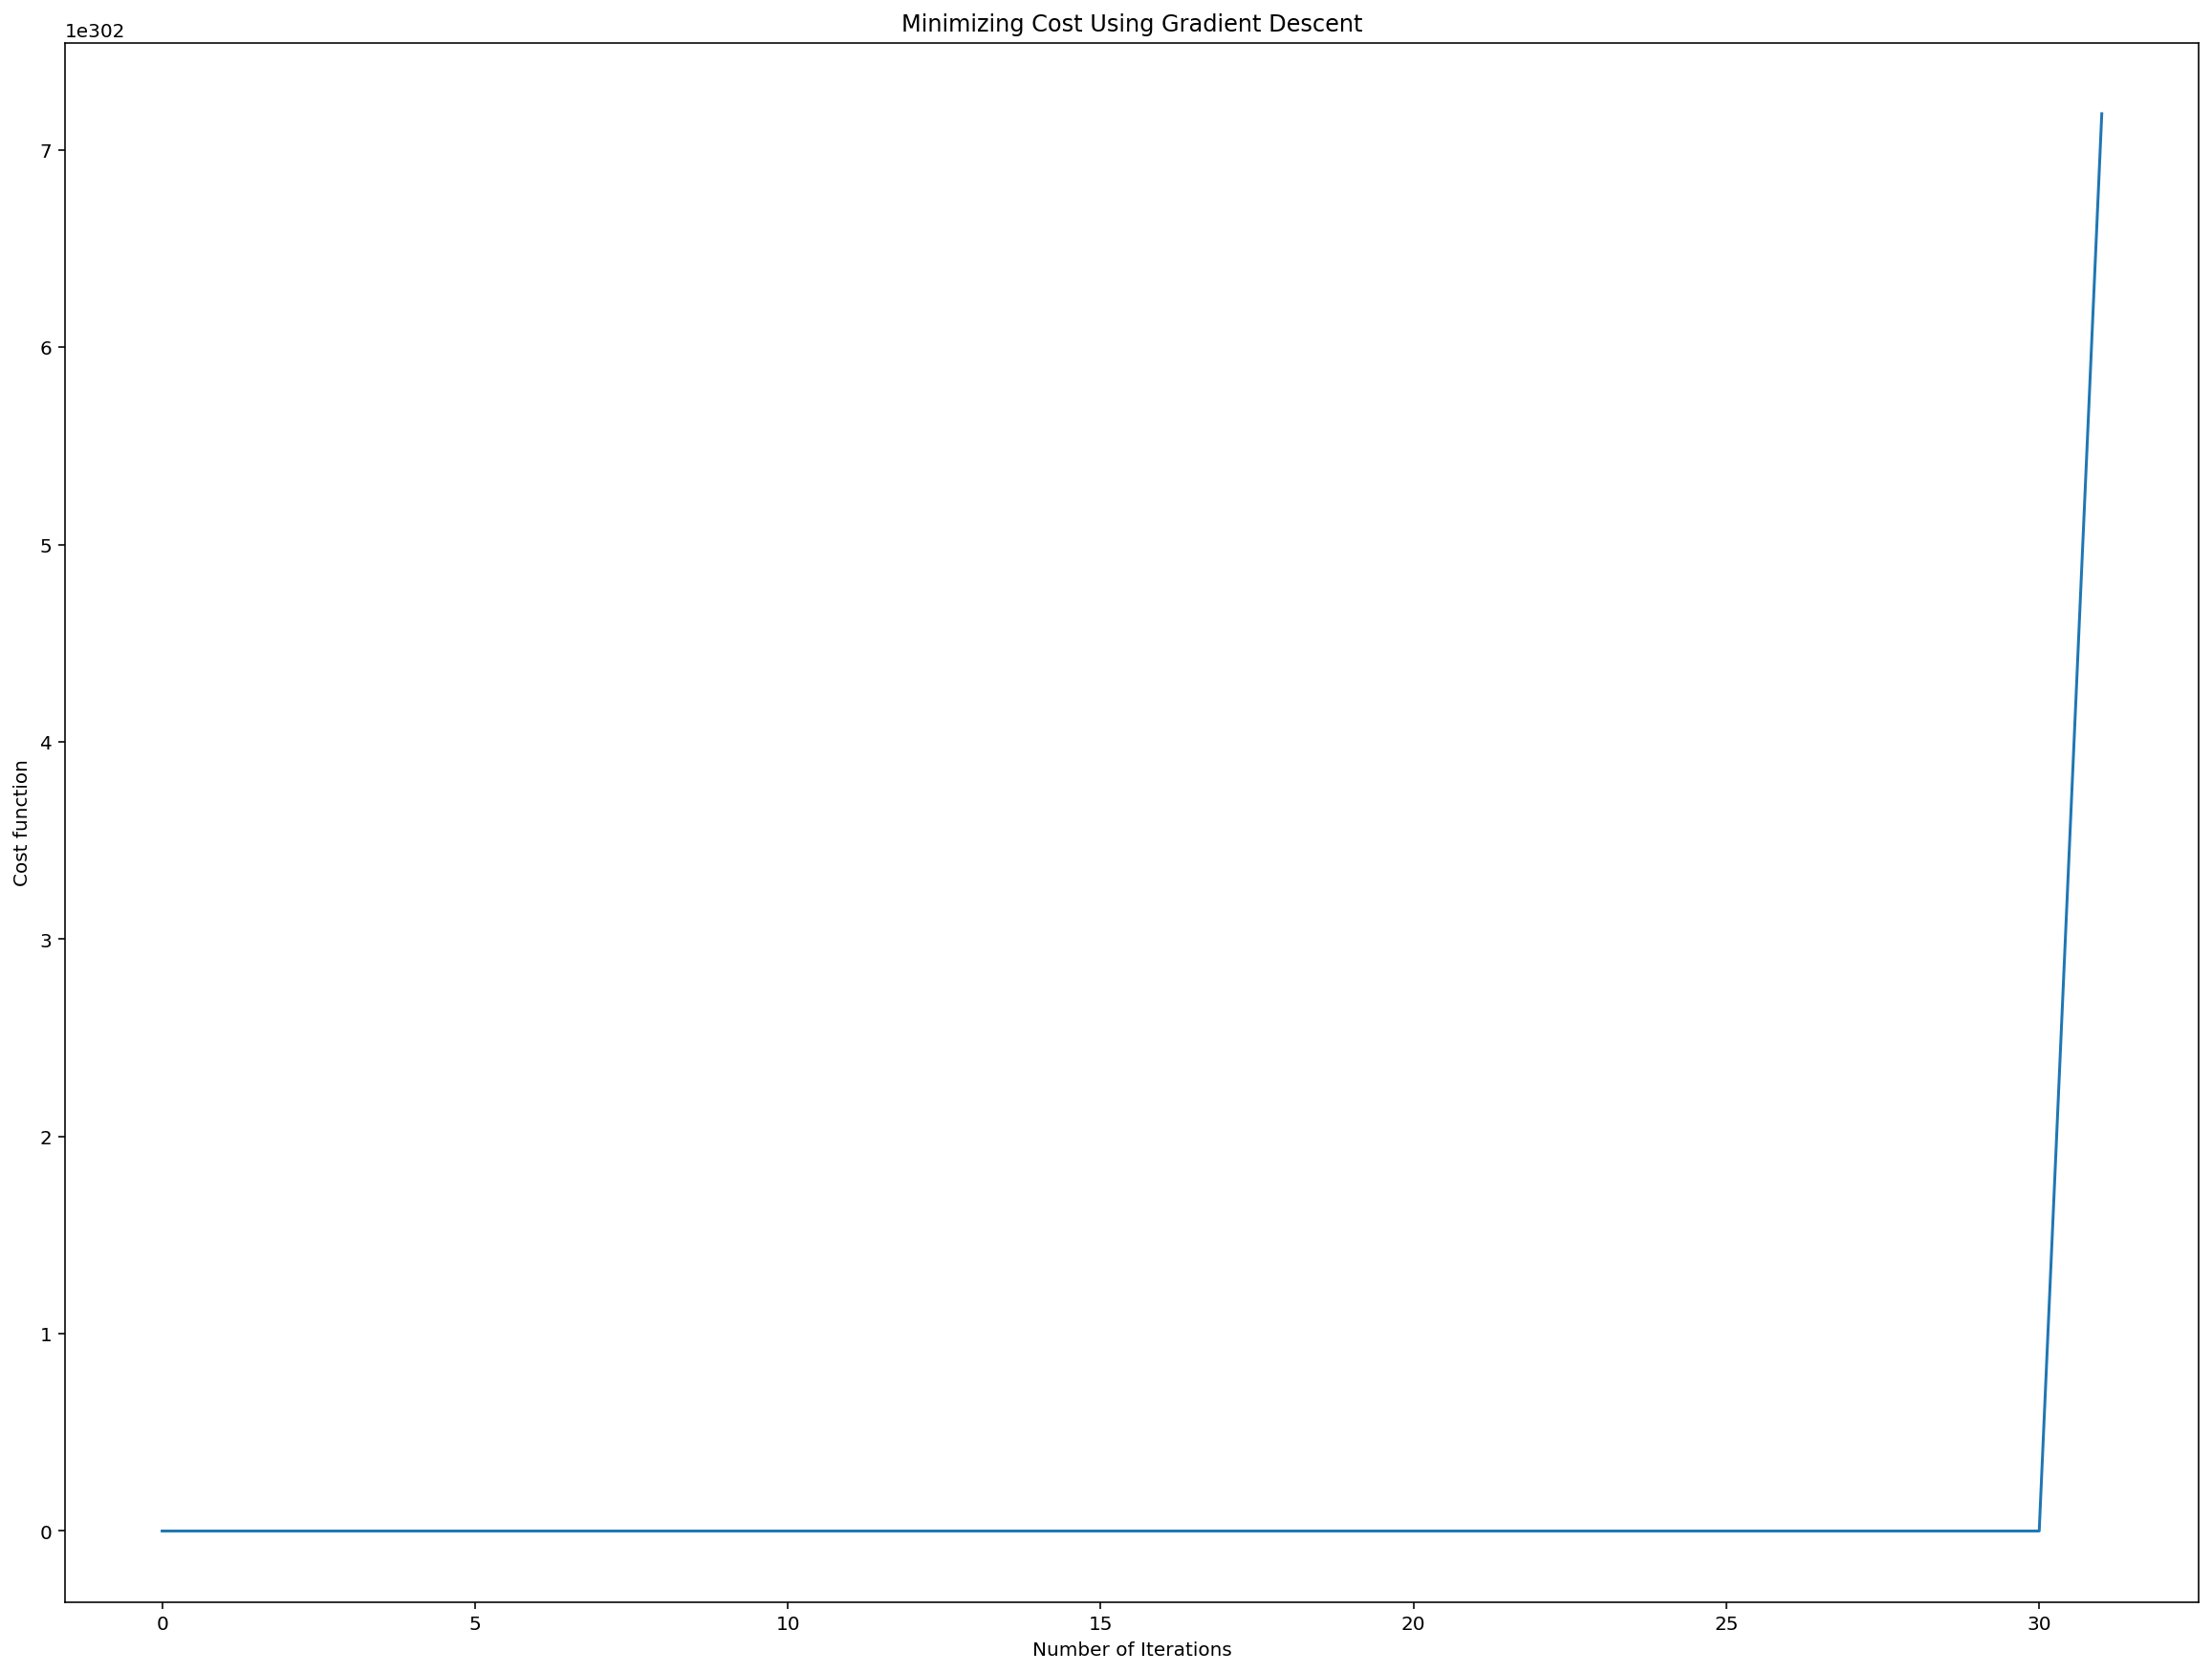

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = "retina"
plt.rcParams['figure.figsize'] = (20.0, 15.0) # set default size of plots

plt.figure(figsize=(20,15))
plt.plot(cost.reshape(-1))
plt.ylabel("Cost function")
plt.xlabel("Number of Iterations")
plt.title("Minimizing Cost Using Gradient Descent");

In [22]:
def linearFit(value):
    return betaFit[0] + betaFit[1] * value

In [23]:
linFit = linearFit(x_test)
print(linFit)

[[nan]]


In [24]:
# scikit-learn variables engineering
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [25]:
# fit scaler normalisation
scaler = MinMaxScaler().fit(X)

# transform training data
X_norm = scaler.transform(X)
x_test=(x_test-min(X[:,1]))/(max(X[:,1])-min(X[:,1]))
X_norm[:,0]=+1

In [26]:
betaFit, betaHist, cost, iterations = gradientDescent(X_norm, y, beta, alpha, max_iterations)

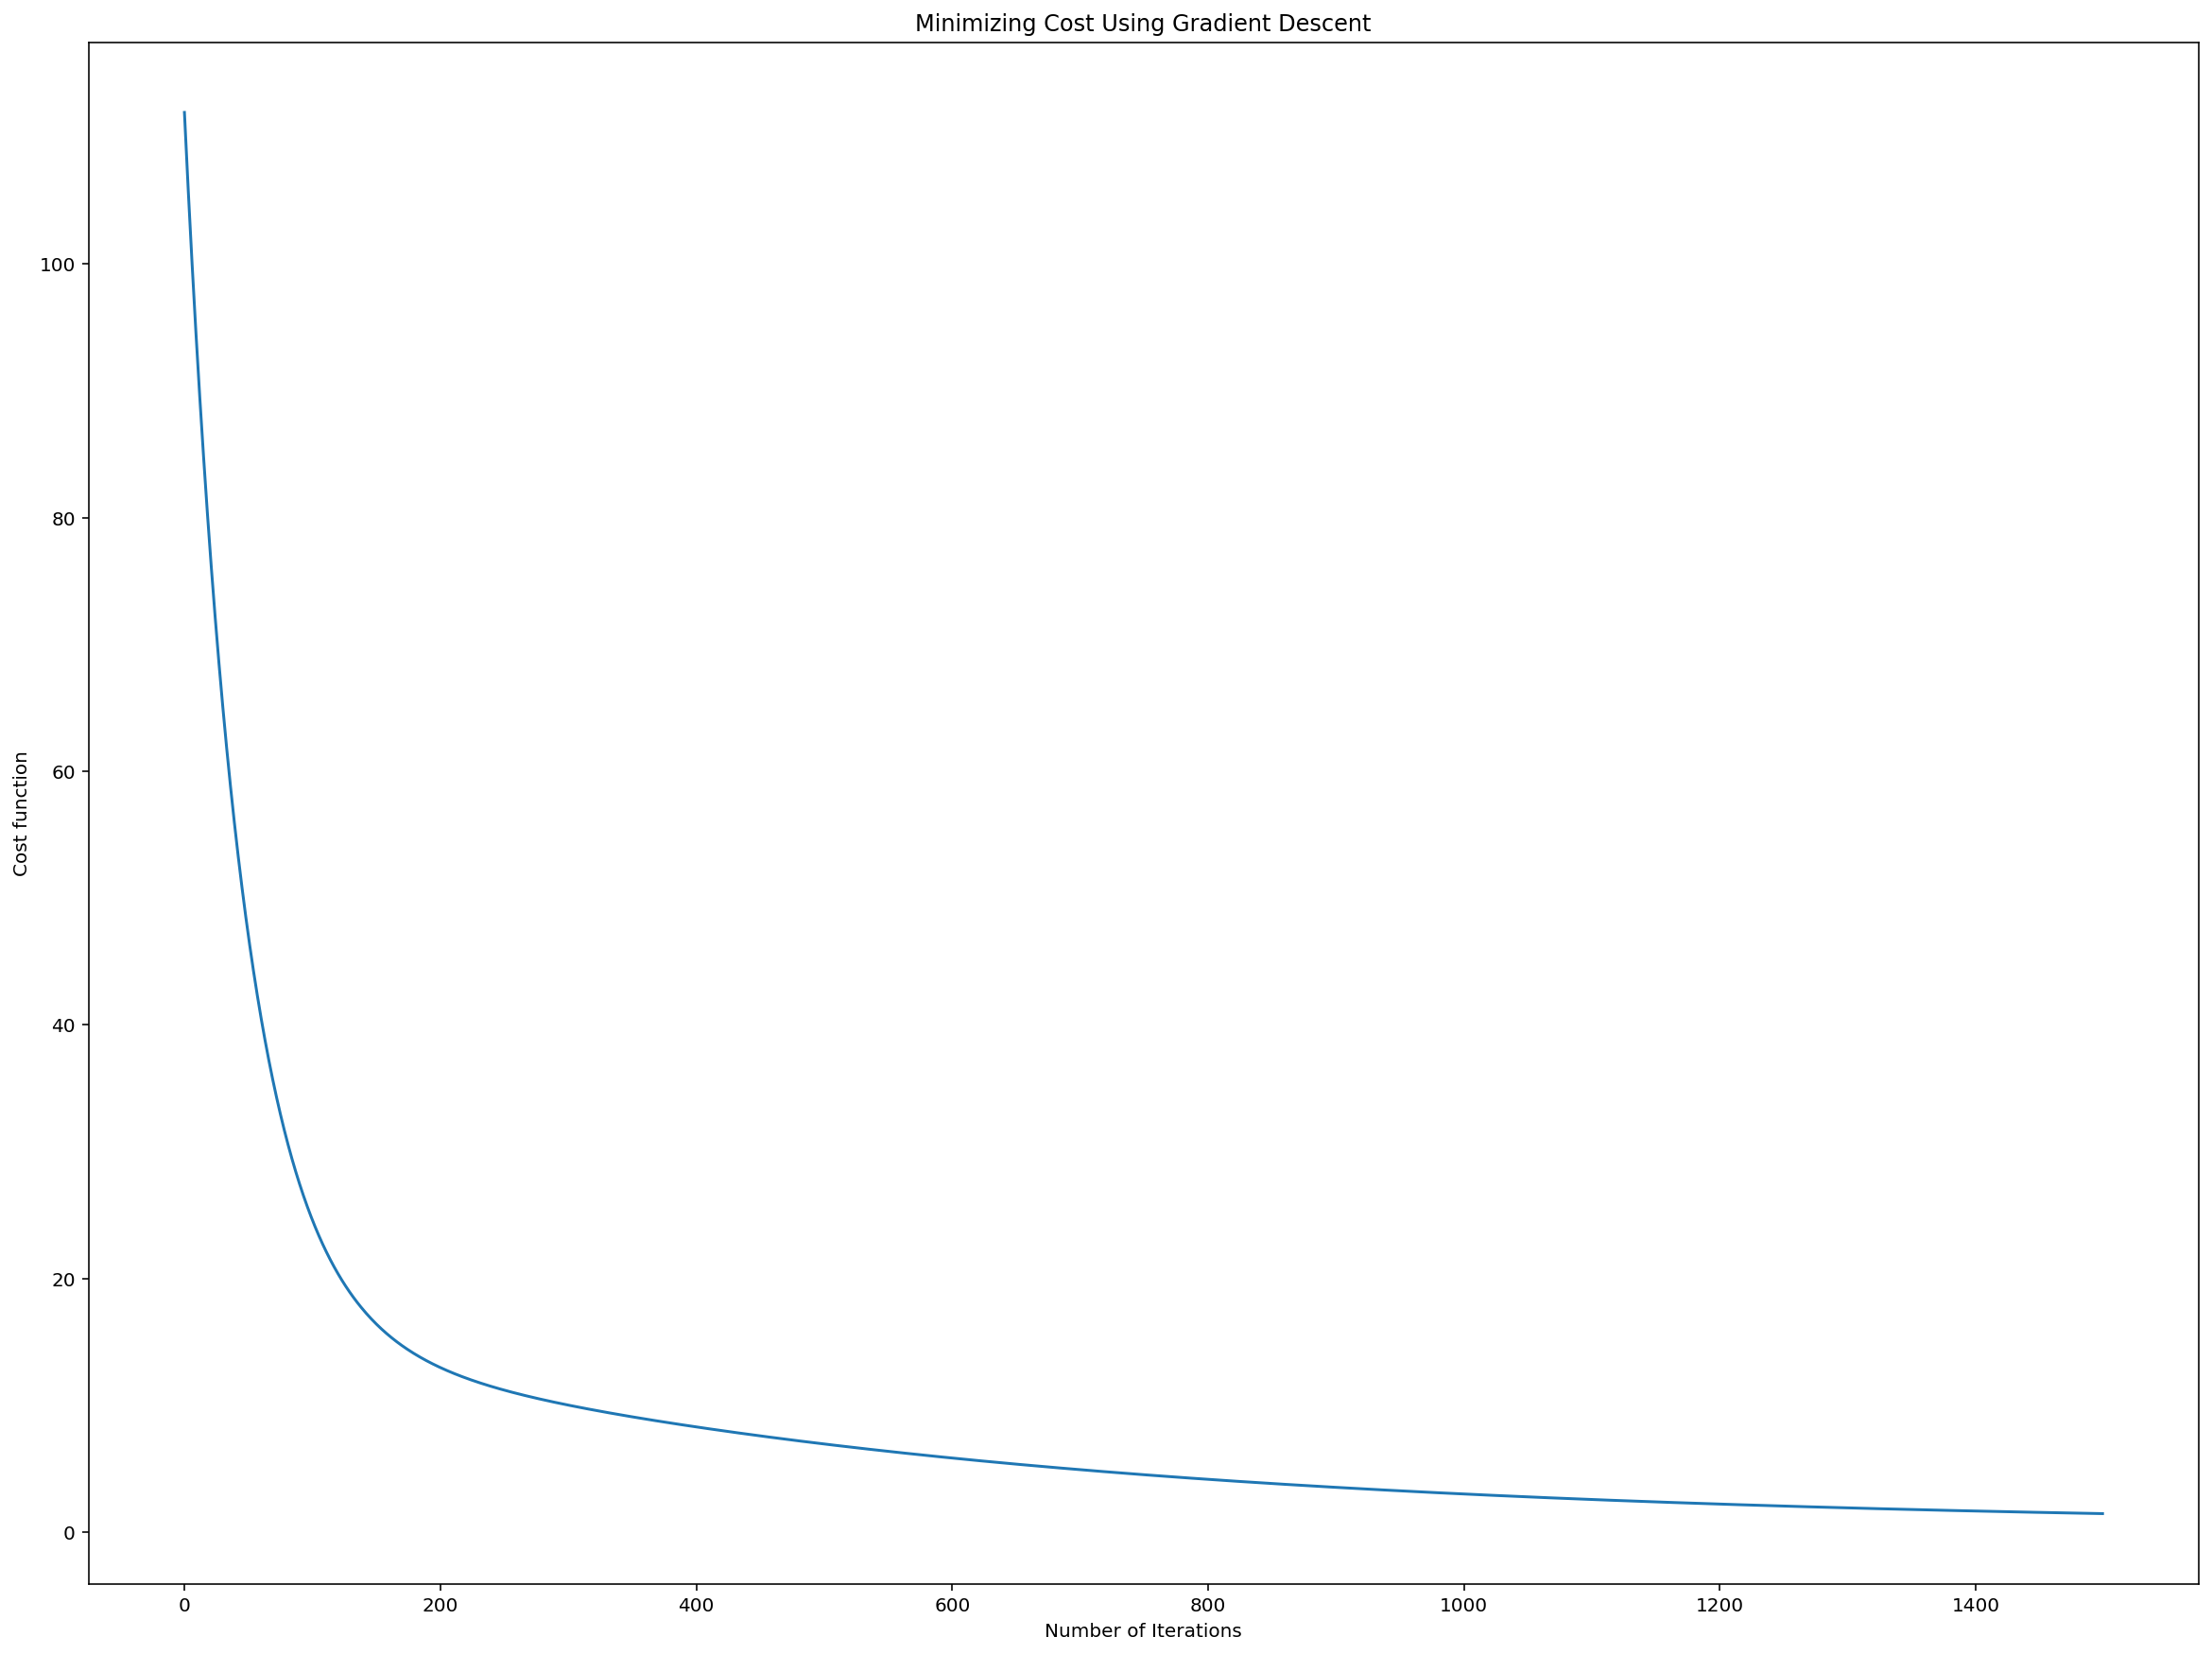

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = "retina"
plt.rcParams['figure.figsize'] = (20.0, 15.0) # set default size of plots

plt.figure(figsize=(20,15))
plt.plot(cost.reshape(-1))
plt.ylabel("Cost function")
plt.xlabel("Number of Iterations")
plt.title("Minimizing Cost Using Gradient Descent");

In [28]:
linFit = linearFit(x_test)
print(linFit)

[[12.98342391]]


In [29]:
# fit scaler normalisation
scaler = StandardScaler().fit(X)

# transform training data
X_std = scaler.transform(X)
x_test=1800
x_test=(x_test-np.mean(X[:,1]))/np.std(X[:,1])
X_std[:,0]=+1

In [30]:
betaFit, betaHist, cost, iterations = gradientDescent(X_std, y, beta, alpha, max_iterations)

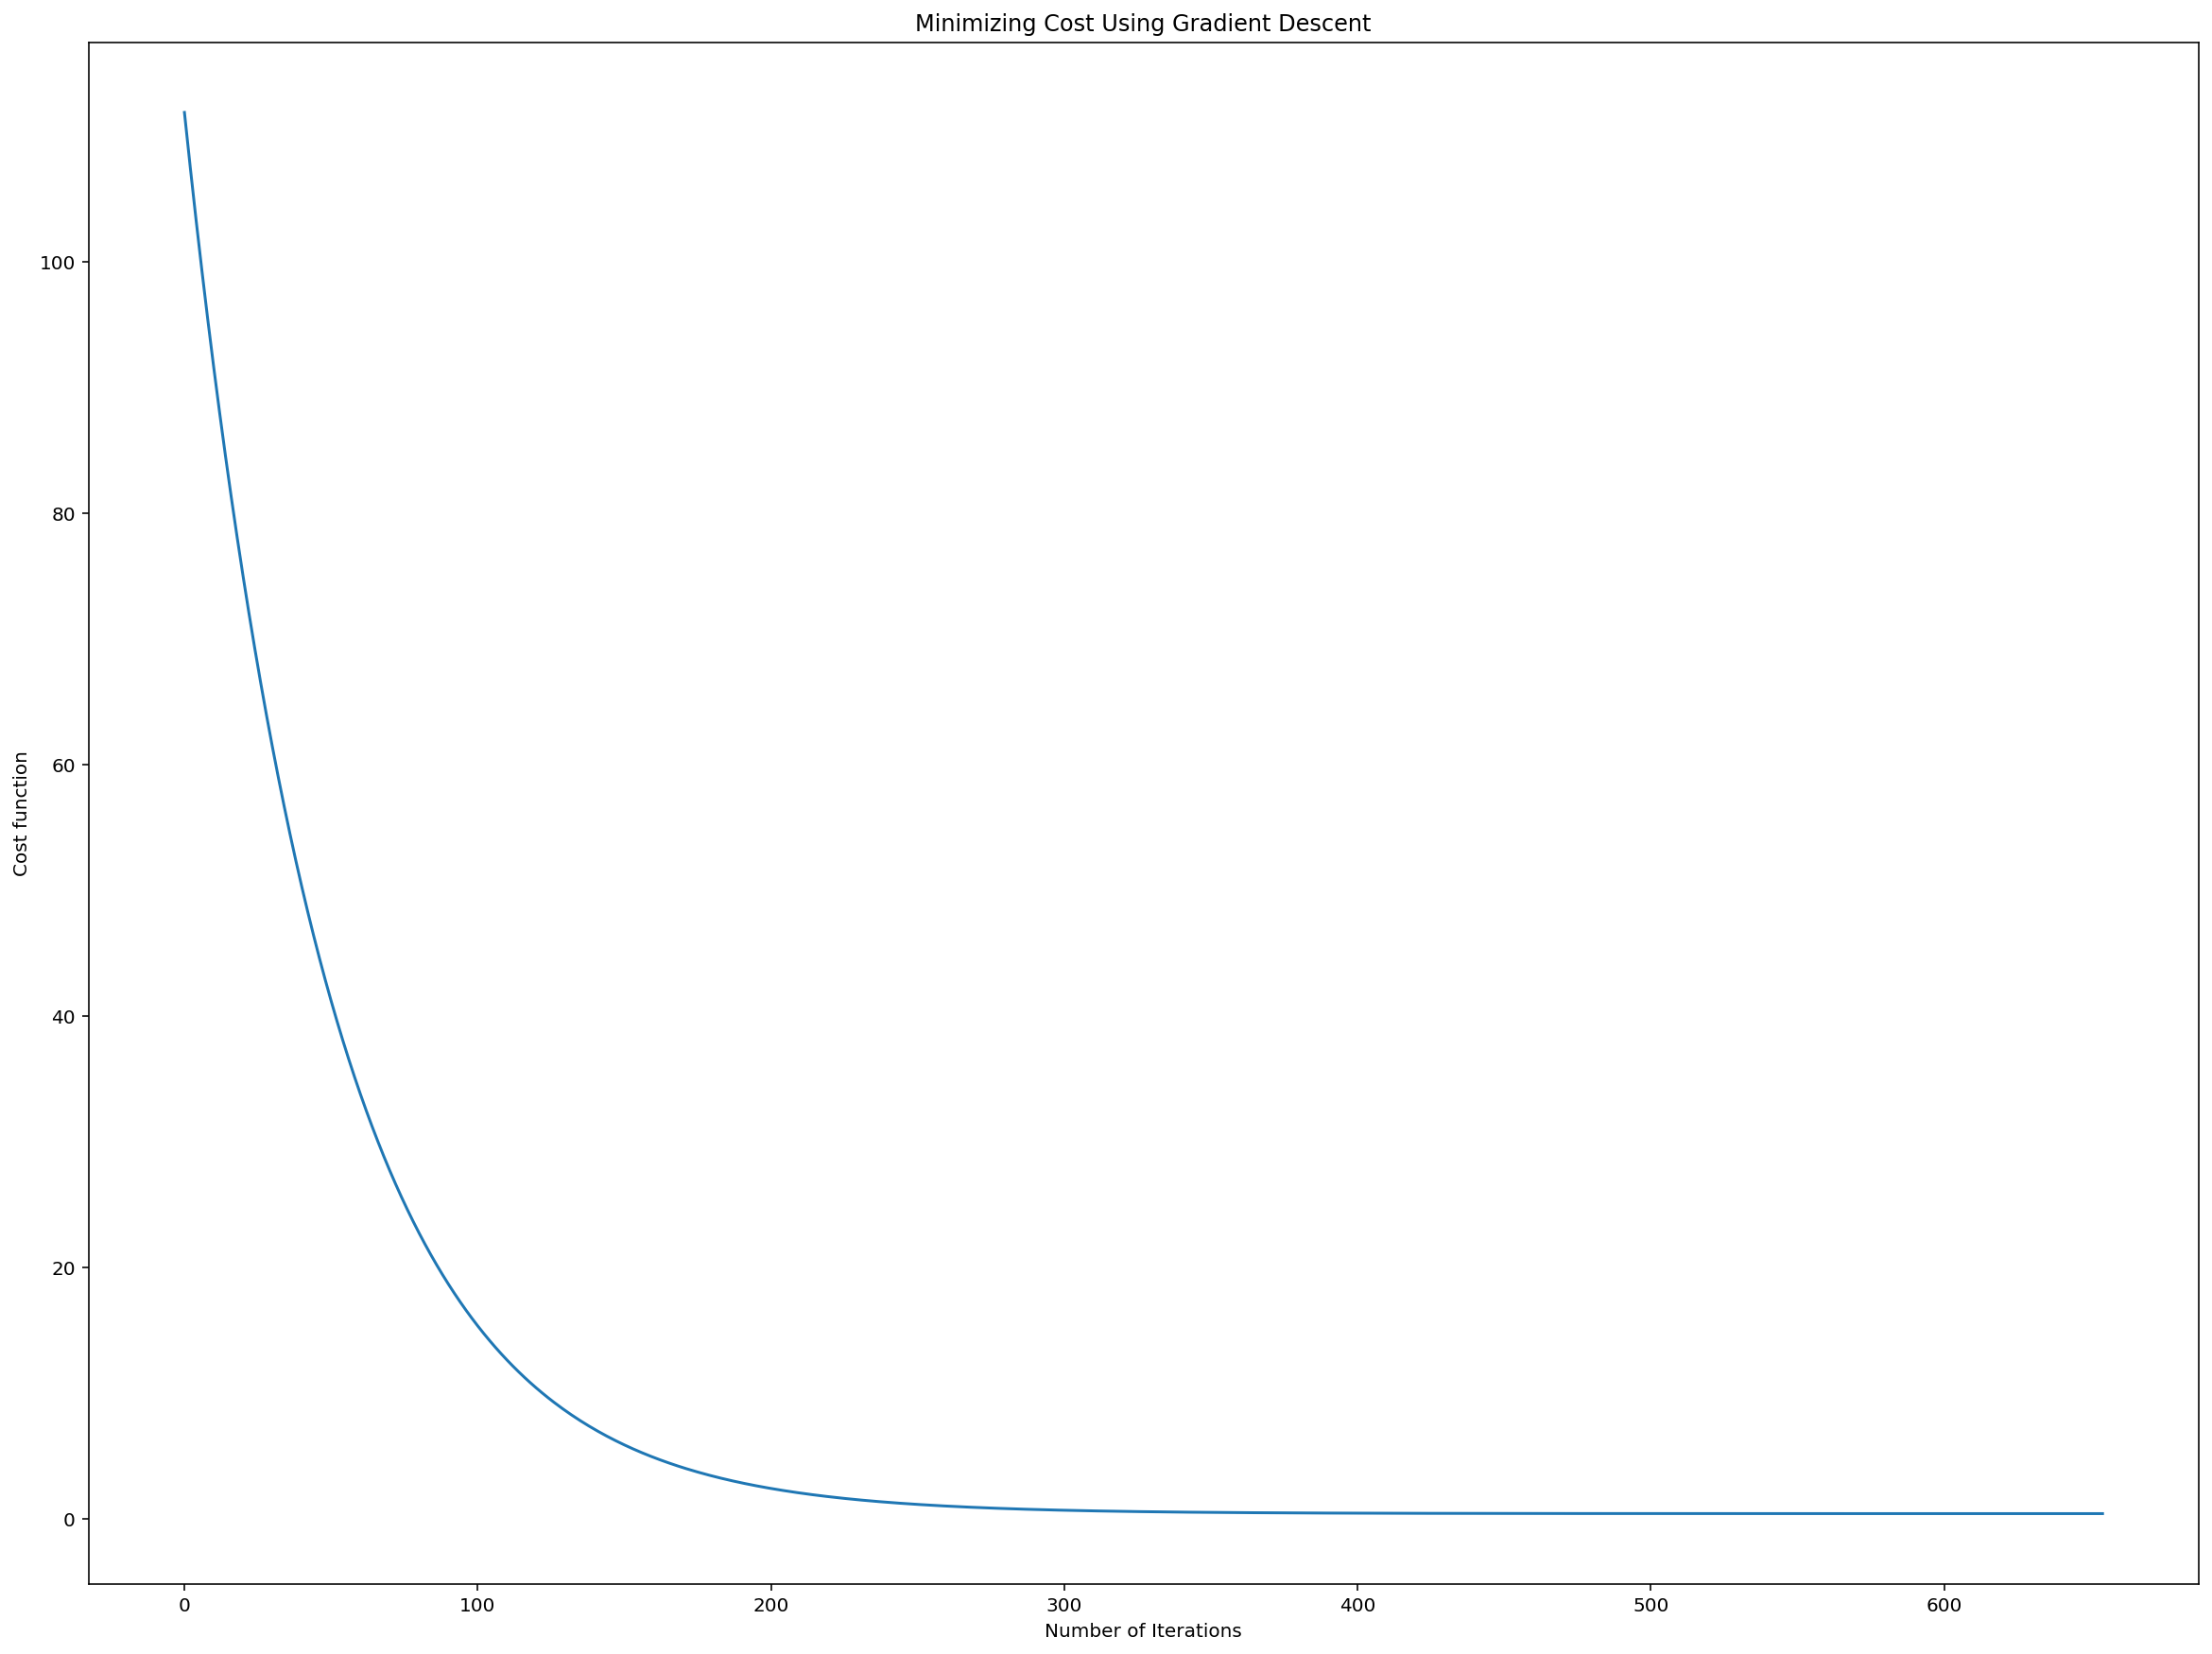

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = "retina"
plt.rcParams['figure.figsize'] = (20.0, 15.0) # set default size of plots

plt.figure(figsize=(20,15))
plt.plot(cost.reshape(-1))
plt.ylabel("Cost function")
plt.xlabel("Number of Iterations")
plt.title("Minimizing Cost Using Gradient Descent");

In [32]:
linFit = linearFit(x_test)
print(linFit)

12.71166414611515
